TensorFlow Version: 2.18.0
Addition Result: 8


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71 (284.00 B)

 Trainable params: 71 (284.00 B)

 Non-trainable params: 0 (0.00 B)

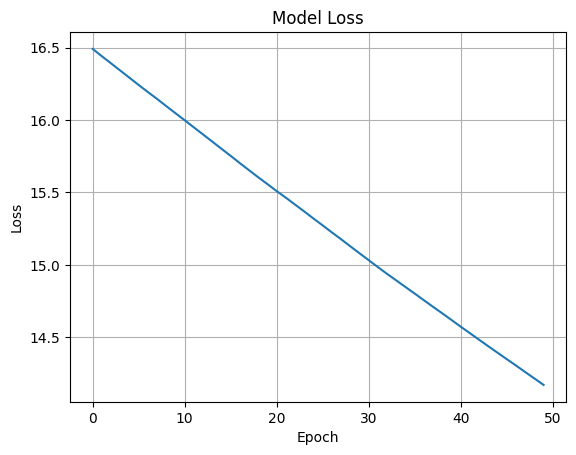

PyTorch Version: 2.6.0+cu124
CUDA Available: False
SimpleNN(
  (hidden): Linear(in_features=5, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)
Custom Loss: 1.0


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215 (864.00 B)

 Trainable params: 71 (284.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 144 (580.00 B)

PyTorch model loaded successfully.


In [3]:
# 1. Install and verify TensorFlow
# pip install tensorflow
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

# 2. Define a simple addition function using tf.function
@tf.function
def add(a, b):
    return a + b

result = add(5, 3)
print("Addition Result:", result.numpy())

# 3. Simple neural network with one hidden layer in TensorFlow
from tensorflow.keras import layers, models
model_tf = models.Sequential([
    layers.Input(shape=(5,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])
model_tf.compile(optimizer='adam', loss='mse')
model_tf.summary()

# 4. Visualize training progress using Matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100, 1)
y = 3 * x + 2 + np.random.randn(100, 1) * 0.1

model_vis = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
model_vis.compile(optimizer='adam', loss='mse')
history = model_vis.fit(x, y, epochs=50, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 5. Install and verify PyTorch
# pip install torch torchvision
import torch
print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())

# 6. Simple neural network in PyTorch
import torch.nn as nn
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(5, 10)
        self.output = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        return self.output(x)

model = SimpleNN()
print(model)

# 7. Define loss function and optimizer in PyTorch
import torch.optim as optim
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 8. Custom loss function in PyTorch
def custom_loss(output, target):
    return torch.mean((output - target) ** 2)

predicted = torch.tensor([2.0, 3.0], requires_grad=True)
actual = torch.tensor([1.0, 2.0])
loss = custom_loss(predicted, actual)
loss.backward()
print("Custom Loss:", loss.item())

# 9. Save and load a TensorFlow model
model_tf.save("my_model.keras")
# or use "my_model.h5" if needed for legacy support
loaded_model_tf = tf.keras.models.load_model("my_model.keras")
loaded_model_tf.summary()


# 9. Save and load a PyTorch model
torch.save(model.state_dict(), "simple_nn.pth")

model_loaded = SimpleNN()
model_loaded.load_state_dict(torch.load("simple_nn.pth"))
model_loaded.eval()
print("PyTorch model loaded successfully.")
